In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data 
sleep = pd.read_csv('Sleep_Efficiency.csv')

# Drop NA values
sleep = sleep.dropna()
sleep['Smoking status'] = sleep['Smoking status'].map({'Yes': 1, 'No': 0})
sleep

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,3/6/21 1:00,3/6/21 7:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,Male,12/5/21 2:00,12/5/21 9:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,Female,5/25/21 21:30,5/25/21 5:30,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,Female,11/3/21 2:30,11/3/21 8:30,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,Male,3/13/21 1:00,3/13/21 9:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,11/16/21 23:00,11/16/21 6:30,7.5,0.53,28,20,52,4.0,50.0,2.0,1,1.0
447,448,27,Female,11/13/21 22:00,11/13/21 5:30,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,449,52,Male,3/31/21 21:00,3/31/21 3:00,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
450,451,45,Male,7/29/21 21:00,7/29/21 4:00,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [3]:
sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,3/6/21 1:00,3/6/21 7:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,Male,12/5/21 2:00,12/5/21 9:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,Female,5/25/21 21:30,5/25/21 5:30,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,Female,11/3/21 2:30,11/3/21 8:30,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,Male,3/13/21 1:00,3/13/21 9:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


In [4]:
x = sleep[['Age','Sleep duration','REM sleep percentage','Deep sleep percentage','Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status']]
x = x.dropna().to_numpy()

y = sleep["Sleep efficiency"]
y = y.dropna().to_numpy().reshape(-1, 1)

#train model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

MSE= mean_squared_error(y, y_pred)
R2= r2_score(y, y_pred)

print(model.coef_)
print(model.intercept_)
print(MSE)
print(R2)


[[ 0.00098809  0.00131548  0.00269625  0.0014803  -0.00417655 -0.03328945
   0.00020426 -0.0055961  -0.04583419]]
[0.77345481]
0.0036616176139473216
0.8006607212388992


194
194
Alphas 0:
Train Score: 0.78358910
Test Score: 0.78962388
--------------------
Alphas 0.25:
Train Score: 0.78487887
Test Score: 0.80146669
--------------------
Alphas 15:
Train Score: 0.78242208
Test Score: 0.79796756
--------------------
Alphas 100:
Train Score: 0.76510123
Test Score: 0.77740287
--------------------
Alphas 200:
Train Score: 0.75145881
Test Score: 0.76375962
--------------------
Alphas 300:
Train Score: 0.74075913
Test Score: 0.75379754
--------------------


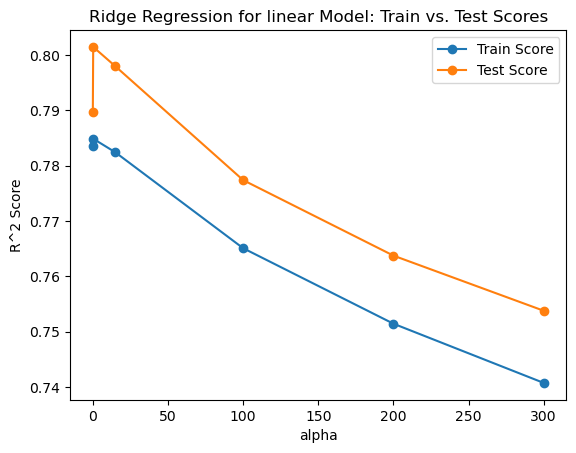

In [5]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, test_size=0.5, random_state=42)

print(len(x_train))
print(len(x_test))

alphas = [0, 0.25,15,100,200,300]
train_scores = []
test_scores = []

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(x_train, y_train)

    # predicting y with ridge model
    Y_train_ridge_pred = model_ridge.predict(x_train)
    Y_test_ridge_pred = model_ridge.predict(x_test)

    # model scores
    train_score = model_ridge.score(x_train, y_train)
    test_score = model_ridge.score(x_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    
        
    print(f"Alphas {alpha}:")
    print(f"Train Score: {train_score:.8f}")
    print(f"Test Score: {test_score:.8f}")
    print("-" * 20)

# plot scores for training data and test data across alpha values
plt.plot(alphas, train_scores, '-o', label='Train Score')
plt.plot(alphas, test_scores, '-o', label='Test Score')
plt.xlabel("alpha")
plt.ylabel("R^2 Score")
plt.title("Ridge Regression for linear Model: Train vs. Test Scores")
plt.legend()
plt.show()

Degree 0:
Train Score: 0.00000000
Test Score: -0.03928565
--------------------
Degree 1:
Train Score: 0.78488016
Test Score: 0.80147760
--------------------
Degree 2:
Train Score: -5.58964431
Test Score: -9.07917887
--------------------
Degree 3:
Train Score: 0.97174337
Test Score: -15.53740678
--------------------
Degree 4:
Train Score: 1.00000000
Test Score: -9836.34225124
--------------------
Degree 5:
Train Score: 1.00000000
Test Score: -53199064.44733664
--------------------
Degree 6:
Train Score: 1.00000000
Test Score: -549544865.74966741
--------------------
Degree 7:
Train Score: 1.00000000
Test Score: -4383285628.11214733
--------------------
Degree 8:
Train Score: 1.00000000
Test Score: -5606477960.63898754
--------------------
Degree 9:
Train Score: 1.00000000
Test Score: -180588433260.10021973
--------------------
Degree 10:
Train Score: 1.00000000
Test Score: -1031809114952.55371094
--------------------
Degree 11:
Train Score: 1.00000000
Test Score: -6347301641217.54394531

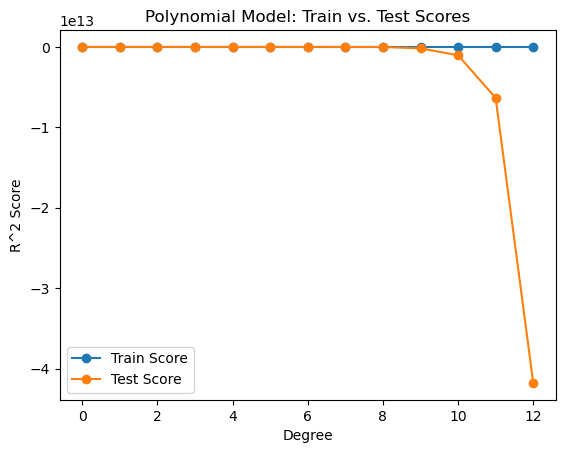

In [6]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   train_size=0.5, 
                                                   test_size=0.5, 
                                                   random_state=42)

degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

train_scores = []
test_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    poly_features_train = poly.fit_transform(x_train)
    model = LinearRegression()
    model.fit(poly_features_train, y_train)
    
    y_pred_train = model.predict(poly_features_train)
    
    poly_features_test = poly.fit_transform(x_test)
    y_pred_test = model.predict(poly_features_test)
    
    train_score = r2_score(y_train, y_pred_train) 
    test_score = r2_score(y_test, y_pred_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"Degree {degree}:")
    print(f"Train Score: {train_score:.8f}")
    print(f"Test Score: {test_score:.8f}")
    print("-" * 20)

# plot scores for training data and test data across degrees
plt.plot(degrees, train_scores, '-o', label='Train Score')
plt.plot(degrees, test_scores, '-o', label='Test Score')
plt.xlabel("Degree")
plt.ylabel("R^2 Score")
plt.title("Polynomial Model: Train vs. Test Scores")
plt.legend() 
plt.show()